# Exercise 4: Data Preparation and Preprocessing

--------------------

In this exercise, we will again work on the iris data set. The task of this week is to examine different preprocessing steps like principal component analysis and linear discriminant analysis. In a further step, the influence of these preprocessing steps on the classification with the k-nearest-neighbor classifier shall be investigated.

------------------------

## Task 1: Load data
Load the iris data set into a *pandas* dataframe.

In [ ]:
import pandas as pd

iris = pd.read_csv('iris/bezdekIris.data', sep=',', header=None, names=['sepal length','sepal width','petal length','petal width', 'class'])

iris.head(5)


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Task 2: Scaling

The k-nearest-neighbor algorithm that we are going to use for classification is a distance-based algorithm. Since the distance between different data points in the feature space depends heavily on the scaling of the features, the results of the k-nearest-neighbor algorithm do as well change with different scaling.

In order to eliminate this influence, the data shall be normalized. Perform the normalization of the features and check the resulting scaled feature distributions to see the differences to the unscaled distributions.


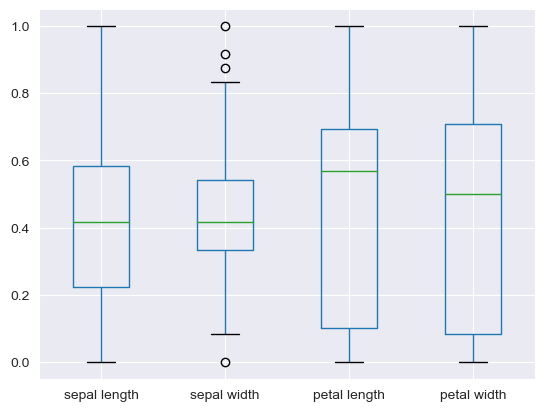

In [2]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

scaler = MinMaxScaler()
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
iris_scaled = pd.DataFrame(scaler.fit_transform(iris[feature_names]), columns=feature_names)

# boxplot of scaled distributions
iris_scaled.boxplot()
plt.show()

In [3]:
# check mean values and standard deviation

print('Feature mean values')
print(iris_scaled.mean())

print('Feature standard deviation')
print(iris_scaled.std())

Feature mean values
sepal length    0.428704
sepal width     0.440556
petal length    0.467458
petal width     0.458056
dtype: float64
Feature standard deviation
sepal length    0.230018
sepal width     0.181611
petal length    0.299203
petal width     0.317599
dtype: float64


After normalization, the minimum value of all features is 0, the maximum value is 1. The mean values and standard deviation of the features are different and depend on the statistical distribution of the feature values.

## Task 3: PCA

We now want to examine several dimensionality reduction methods, starting with a principal component analysis to extract the features that explain most of the variance in the data set.

a) Use scikit-learn to perform the principal component analysis of the scaled features and plot the first two principal components. How well can the classes be separated using these first two components?

In [4]:
from sklearn.decomposition import PCA

pca = PCA()

# transform data
iris_pca = pd.DataFrame(pca.fit_transform(iris_scaled))
iris_pca.columns = ['PC{}'.format(i+1) for i in iris_pca.columns]
iris_pca['class'] = iris['class']
iris_pca.head()

,PC1,PC2,PC3,PC4,class
0,-0.630703,0.107578,-0.018719,-0.007307,Iris-setosa
1,-0.622905,-0.104260,-0.049142,-0.032359,Iris-setosa
2,-0.669520,-0.051417,0.019644,-0.007434,Iris-setosa
3,-0.654153,-0.102885,0.023219,0.020114,Iris-setosa
4,-0.648788,0.133488,0.015116,0.011786,Iris-setosa


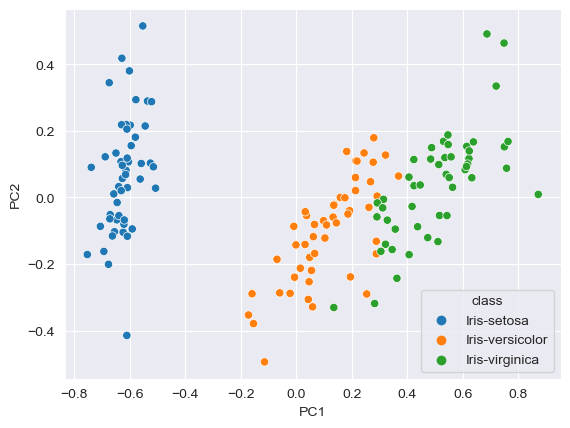

In [5]:
# plot first two principal components
import seaborn as sns

sns.scatterplot(iris_pca, x='PC1', y='PC2', hue='class')
plt.show()

The iris setosa class can be clearly separated from the two other classes. Iris versicolor and iris virginica cannot be totally separated. This is similar to the results from the pairplots in exercise 3. In conclusion, the principal component analysis will probably not lead to a better classification result than the one already attained in the last exercise.

b) Take a look at the variance that is explained by the principal components. To how many dimensions can the data set be reduced, if we want to be able to explain at least 90 % of the total variance?

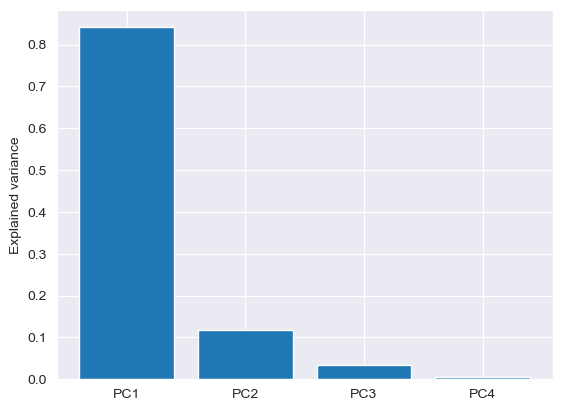

In [6]:
explained_var = pca.explained_variance_ratio_

# bar plot of the explained variance ratios
plt.bar(range(1, len(explained_var)+1), explained_var, tick_label=['PC1', 'PC2', 'PC3', 'PC4'])
plt.ylabel('Explained variance')
plt.show()

In [7]:
# cumulated explained variance to check the number of components that explain 90 % of the variance
print(pca.explained_variance_ratio_.cumsum())

[0.84136038 0.95887846 0.99361408 1.        ]


The first two principal components already make up for more than 90 % of the total variance. As a result, the data set can be reduced to these two features for further analysis. The two other principal components only explain a small amount of the total variance.

c) For better interpretation, it is interesting to examine the importance of the features when constructing the principal components. Take a look at the transformation matrix and examine the influence of the different features on the principal components.

In [8]:
# transformation matrix
transform_matrix = pd.DataFrame(abs(pca.components_), columns=feature_names)
transform_matrix = transform_matrix.set_index('PC{}'.format(i+1) for i in transform_matrix.index)
print(transform_matrix)

     sepal length  sepal width  petal length  petal width
PC1      0.424942     0.150748      0.616267     0.645689
PC2      0.423203     0.903967      0.060383     0.009839
PC3      0.713572     0.336316      0.065900     0.611035
PC4      0.362130     0.216818      0.782449     0.457849


From the transformation matrix, one can see that the first principal component is primarily made up of the petal width and the petal length of the flowers. By contrast, the second principal component is dominated by the sepal width. The sepal length contributes to both of the first two principal components equally.

## Task 4: LDA

As a next step, we want to find a representation with reduced dimensions that best separates the different iris flowers. To achieve this, we use a linear discriminant analysis. Implement an LDA transformation using the scikit-learn library and plot the results of the transformation.

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda.fit(iris_scaled, iris['class'])
iris_lda = pd.DataFrame(lda.transform(iris_scaled))

iris_lda.columns = ['Component {}'.format(i+1) for i in iris_lda.columns]
iris_lda['class'] = iris['class']

iris_lda.head()

,Component 1,Component 2,class
0,8.061800,0.300421,Iris-setosa
1,7.128688,-0.786660,Iris-setosa
2,7.489828,-0.265384,Iris-setosa
3,6.813201,-0.670631,Iris-setosa
4,8.132309,0.514463,Iris-setosa


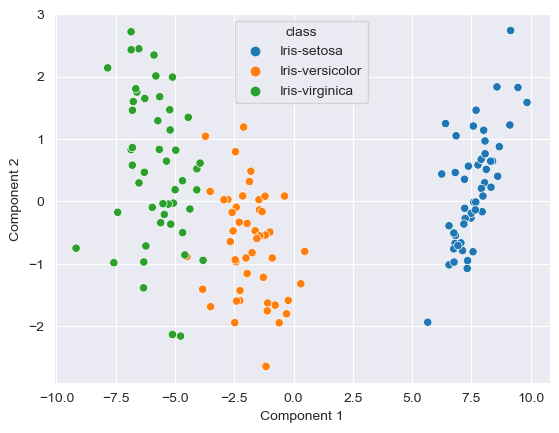

In [10]:
# scatter plot of the LDA components
sns.scatterplot(iris_lda, x='Component 1', y='Component 2', hue='class')
plt.show()

The separation of the classes is also not perfect after transforming the data with the linear discriminant analysis. However, the iris-setosa and iris-versicolor plants seem better separated than with the principal component analysis.

## Task 5: Examination of preprocessing steps

Use the k-nearest-neighbor algorithm to compare the classification results for different preprocessing steps. Set the number of neighbors to five.

For the comparison, train the algorithm on four differently processed data sets:
1. original data
2. scaled data
3. first two principal components
4. components from the linear discriminant analysis

Evaluate the training results using confusion matrices. Which preprocessing pipeline leads to the best results?


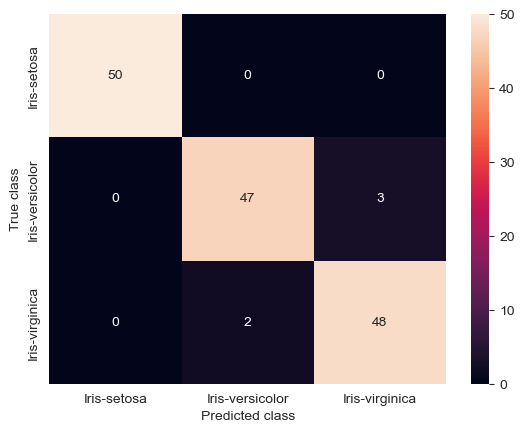

In [11]:
# kNN algorithm on original data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

x = iris[feature_names]
y = iris['class']

# kNN model with n_neighbors = 5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x,y)

y_pred = knn_model.predict(x)

cf = confusion_matrix(y, y_pred, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

sns.heatmap(cf, annot=True, xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

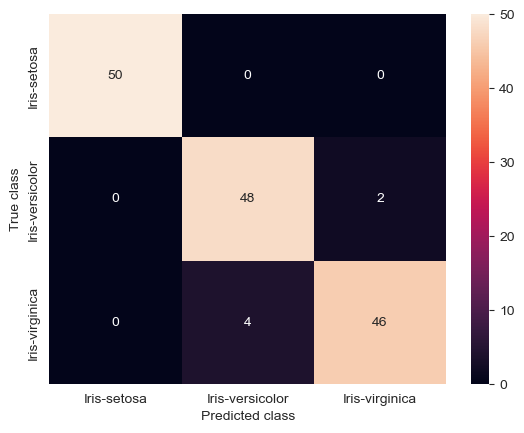

In [12]:
# kNN algorithm on scaled data
x = iris_scaled[feature_names]

knn_model.fit(x,y)

y_pred = knn_model.predict(x)

cf = confusion_matrix(y, y_pred, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

sns.heatmap(cf, annot=True, xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

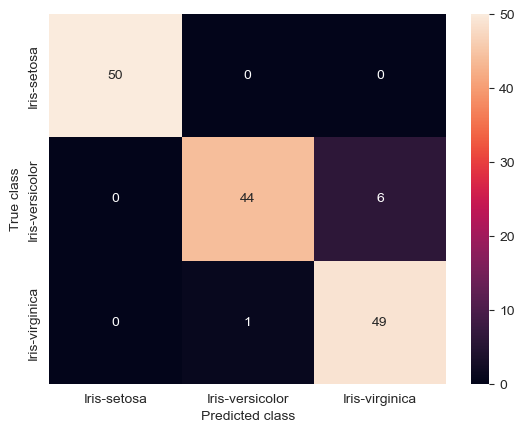

In [13]:
# kNN algorithm on principal components
x = iris_pca[['PC1', 'PC2']]

knn_model.fit(x,y)

y_pred = knn_model.predict(x)

cf = confusion_matrix(y, y_pred, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

sns.heatmap(cf, annot=True, xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

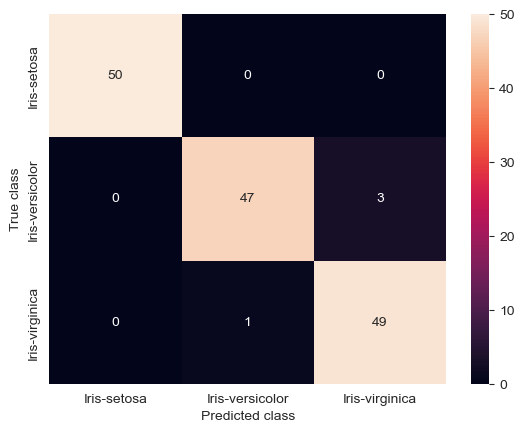

In [14]:
# kNN model on components from LDA
x = iris_lda[['Component 1', 'Component 2']]

knn_model.fit(x,y)

y_pred = knn_model.predict(x)

cf = confusion_matrix(y, y_pred, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

sns.heatmap(cf, annot=True, xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

The classification result is not improved by scaling. Despite the fact that the kNN-algorithm is normally very sensitive to scaling, the normalization of the data leads to a slightly worse result (6 misclassified instances instead of five). This can be explained by the fact, that there is not a huge difference in the scales of the original features which reduces the impact of normalization. On the other hand, the data set is not very large and we have only evaluated the results on the training data. The results might be different on new, unknown data.

PCA also does not lead to better classification results. Keep in mind that PCA looks for the directions with the most variance, but does not take the labels into account. Therefore, it does not necessarily improve classification. Its purpose is more to reduce the dimensionality of the data, which is for example very useful in case of high-dimensional data sets. In the case of the iris data set, the results on the reduced set of two principal components are slightly worse. If you take all four principal components, the results are exactly the same as for the scaled data set. In conclusion, the reduction in dimensionality by PCA leads to a slightly worse performance.

By contrast, the LDA shows better results. Only four instances are misclassified. Here, the reduction to two features improves the separability of the classes and the classification result is better.

In conclusion, the preprocessing with LDA leads to the best results for the classification of the iris data set. When trying different steps of preprocessing, it is always important to evaluate and compare the results in order to see what works best for a specific use case and a specific data set.